In [4]:
from clase import cuartas 
from clasificacion import *
import glob 
import os
from tqdm import tqdm

In [5]:
#Todos los archivos de la carpeta del tipo .xml

xml_files = glob.glob('../Archivos/Corales/corales_completo/*.xml')

In [6]:


def extraer_nombre_archivo(ruta):
    nombre_archivo = os.path.basename(ruta)
    return nombre_archivo


df_final = pd.DataFrame()
xml_error = []
for i in tqdm(xml_files):
    try:
        prueba = cuartas(i)
        df = prueba.extraer_df()
        df_clasificacion = dataframe_clasificacion(df)

        #Nombre del coral

        nombre = extraer_nombre_archivo(i)
        df_clasificacion['Nombre'] =nombre
        df_final = pd.concat([df_final,df_clasificacion])
    except:
        xml_error.append(i)
        continue

print(len(xml_error))

  0%|          | 1/404 [00:00<05:59,  1.12it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

  1%|          | 4/404 [00:02<02:57,  2.25it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índi

  1%|          | 5/404 [00:02<02:45,  2.41it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

  1%|▏         | 6/404 [00:03<03:44,  1.77it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en la función no

  2%|▏         | 7/404 [00:03<03:03,  2.17it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

  2%|▏         | 8/404 [00:03<02:41,  2.45it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

  2%|▏         | 9/404 [00:04<02:45,  2.38it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

  3%|▎         | 14/404 [00:05<02:01,  3.21it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en la función no

  4%|▍         | 16/404 [00:06<01:58,  3.27it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


  4%|▍         | 17/404 [00:06<02:11,  2.95it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

  4%|▍         | 18/404 [00:07<02:18,  2.79it/s]

Error en el índice 15: list index out of range
Error en la función notas_bajos_cadencial:  single positional indexer is out-of-bounds
Error en la función notas_voces_cadencial:  single positional indexer is out-of-bounds
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is n

  6%|▌         | 23/404 [00:08<02:24,  2.64it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

  6%|▌         | 24/404 [00:09<02:40,  2.37it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

  6%|▌         | 25/404 [00:09<02:46,  2.28it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

  7%|▋         | 27/404 [00:10<02:03,  3.06it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


  7%|▋         | 28/404 [00:10<02:01,  3.09it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índi

  7%|▋         | 30/404 [00:11<02:12,  2.83it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

  8%|▊         | 33/404 [00:12<02:23,  2.58it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable


  8%|▊         | 34/404 [00:12<02:13,  2.77it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


  9%|▊         | 35/404 [00:13<02:21,  2.61it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 10%|█         | 41/404 [00:14<01:34,  3.85it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 11%|█         | 43/404 [00:15<02:18,  2.61it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 11%|█         | 44/404 [00:16<02:05,  2.87it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 12%|█▏        | 48/404 [00:18<03:31,  1.68it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 12%|█▏        | 49/404 [00:18<02:56,  2.01it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 12%|█▏        | 50/404 [00:19<03:08,  1.88it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 13%|█▎        | 53/404 [00:20<03:45,  1.56it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 14%|█▎        | 55/404 [00:21<02:43,  2.13it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 

 14%|█▍        | 56/404 [00:22<03:08,  1.85it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 14%|█▍        | 57/404 [00:22<02:55,  1.97it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 14%|█▍        | 58/404 [00:23<02:48,  2.06it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 15%|█▍        | 59/404 [00:23<02:29,  2.31it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 15%|█▌        | 62/404 [00:24<01:53,  3.01it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 16%|█▌        | 63/404 [00:24<01:49,  3.11it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 17%|█▋        | 67/404 [00:25<01:53,  2.97it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 17%|█▋        | 70/404 [00:26<02:01,  2.75it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 18%|█▊        | 71/404 [00:27<02:05,  2.66it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índic

 18%|█▊        | 74/404 [00:28<01:49,  3.02it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 19%|█▊        | 75/404 [00:28<01:53,  2.91it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 19%|█▉        | 76/404 [00:28<01:42,  3.19it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 19%|█▉        | 78/404 [00:29<01:45,  3.09it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 20%|█▉        | 79/404 [00:29<01:39,  3.27it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 21%|██        | 83/404 [00:30<01:39,  3.23it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 

 21%|██        | 85/404 [00:31<02:00,  2.65it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en la función no

 21%|██▏       | 86/404 [00:32<01:49,  2.91it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 

 22%|██▏       | 88/404 [00:32<01:45,  3.00it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 23%|██▎       | 92/404 [00:34<01:48,  2.88it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 23%|██▎       | 93/404 [00:34<01:37,  3.20it/s]

Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en e

 24%|██▎       | 95/404 [00:34<01:26,  3.58it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 24%|██▍       | 97/404 [00:35<01:39,  3.09it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable


 24%|██▍       | 98/404 [00:35<01:35,  3.19it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 25%|██▌       | 101/404 [00:37<01:52,  2.68it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 25%|██▌       | 102/404 [00:37<02:11,  2.30it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índic

 26%|██▌       | 105/404 [00:38<01:48,  2.76it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en la función no

 26%|██▌       | 106/404 [00:39<02:05,  2.38it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 26%|██▋       | 107/404 [00:39<02:11,  2.26it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 27%|██▋       | 110/404 [00:40<01:48,  2.72it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índi

 27%|██▋       | 111/404 [00:41<01:38,  2.96it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 28%|██▊       | 115/404 [00:42<01:42,  2.81it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 30%|███       | 123/404 [00:45<01:55,  2.43it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 

 31%|███       | 125/404 [00:45<01:35,  2.92it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 31%|███▏      | 127/404 [00:46<01:26,  3.20it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 32%|███▏      | 128/404 [00:46<01:27,  3.14it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 32%|███▏      | 129/404 [00:47<01:37,  2.83it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 32%|███▏      | 131/404 [00:47<01:15,  3.63it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 33%|███▎      | 132/404 [00:48<02:30,  1.81it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 33%|███▎      | 135/404 [00:50<02:00,  2.24it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 34%|███▍      | 137/404 [00:51<02:00,  2.21it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


 34%|███▍      | 138/404 [00:51<01:54,  2.33it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 34%|███▍      | 139/404 [00:53<04:11,  1.06it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 35%|███▍      | 140/404 [00:53<03:19,  1.32it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 35%|███▌      | 142/404 [00:56<04:21,  1.00it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 35%|███▌      | 143/404 [00:56<03:27,  1.26it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índi

 36%|███▌      | 144/404 [00:57<03:22,  1.28it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índi

 36%|███▌      | 146/404 [00:57<02:13,  1.93it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable


 37%|███▋      | 148/404 [00:58<01:51,  2.30it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 37%|███▋      | 151/404 [00:59<01:25,  2.95it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 38%|███▊      | 152/404 [00:59<01:43,  2.45it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable


 38%|███▊      | 153/404 [01:00<01:44,  2.41it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 38%|███▊      | 155/404 [01:01<01:44,  2.39it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 39%|███▊      | 156/404 [01:01<01:39,  2.49it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 39%|███▉      | 158/404 [01:02<01:44,  2.36it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 40%|███▉      | 160/404 [01:02<01:24,  2.87it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 41%|████      | 164/404 [01:04<01:23,  2.87it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 41%|████      | 165/404 [01:04<01:21,  2.93it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable


 41%|████      | 166/404 [01:05<01:47,  2.22it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 42%|████▏     | 168/404 [01:06<02:05,  1.89it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 42%|████▏     | 169/404 [01:06<01:44,  2.26it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 42%|████▏     | 170/404 [01:07<01:41,  2.31it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 43%|████▎     | 172/404 [01:07<01:22,  2.80it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


 43%|████▎     | 173/404 [01:07<01:18,  2.93it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 43%|████▎     | 174/404 [01:08<01:31,  2.52it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 43%|████▎     | 175/404 [01:08<01:28,  2.59it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 

 44%|████▍     | 178/404 [01:09<01:10,  3.19it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 44%|████▍     | 179/404 [01:09<01:11,  3.13it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 45%|████▍     | 180/404 [01:10<01:33,  2.40it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índi

 45%|████▍     | 181/404 [01:10<01:25,  2.62it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 45%|████▌     | 182/404 [01:11<01:29,  2.49it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 45%|████▌     | 183/404 [01:11<01:41,  2.19it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 

 46%|████▌     | 185/404 [01:12<01:16,  2.87it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 46%|████▌     | 186/404 [01:12<01:09,  3.14it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneTy

 46%|████▋     | 187/404 [01:12<01:03,  3.41it/s]

Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable


 47%|████▋     | 188/404 [01:13<01:08,  3.17it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 47%|████▋     | 190/404 [01:13<01:02,  3.45it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 48%|████▊     | 193/404 [01:14<01:12,  2.90it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 48%|████▊     | 194/404 [01:15<01:20,  2.60it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en la función no

 49%|████▊     | 196/404 [01:16<01:41,  2.05it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 49%|████▉     | 197/404 [01:16<01:28,  2.33it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


 49%|████▉     | 198/404 [01:17<01:26,  2.39it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 49%|████▉     | 199/404 [01:17<01:35,  2.15it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 51%|█████     | 206/404 [01:20<01:08,  2.90it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 51%|█████     | 207/404 [01:20<00:59,  3.31it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 52%|█████▏    | 209/404 [01:21<00:58,  3.34it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índic

 52%|█████▏    | 211/404 [01:21<01:00,  3.21it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 52%|█████▏    | 212/404 [01:21<00:58,  3.27it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable


 53%|█████▎    | 213/404 [01:22<00:59,  3.19it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 53%|█████▎    | 214/404 [01:22<00:57,  3.33it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 53%|█████▎    | 216/404 [01:23<00:50,  3.76it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 54%|█████▍    | 219/404 [01:24<01:04,  2.85it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 54%|█████▍    | 220/404 [01:24<01:00,  3.02it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 55%|█████▍    | 221/404 [01:30<05:48,  1.90s/it]

Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el 

 55%|█████▌    | 223/404 [01:30<03:17,  1.09s/it]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 56%|█████▌    | 226/404 [01:32<01:53,  1.56it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 56%|█████▌    | 227/404 [01:32<01:33,  1.89it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 56%|█████▋    | 228/404 [01:32<01:27,  2.00it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índic

 57%|█████▋    | 229/404 [01:33<01:15,  2.33it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 57%|█████▋    | 230/404 [01:33<01:07,  2.56it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 57%|█████▋    | 231/404 [01:33<01:10,  2.45it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 57%|█████▋    | 232/404 [01:34<01:03,  2.73it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 59%|█████▊    | 237/404 [01:35<00:54,  3.09it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 59%|█████▉    | 240/404 [01:36<00:46,  3.49it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 60%|█████▉    | 241/404 [01:36<00:47,  3.43it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 60%|█████▉    | 242/404 [01:37<00:47,  3.43it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 60%|██████    | 243/404 [01:37<00:45,  3.52it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 61%|██████    | 246/404 [01:38<00:57,  2.77it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 61%|██████    | 247/404 [01:38<00:52,  3.01it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable


 61%|██████▏   | 248/404 [01:39<00:53,  2.94it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 62%|██████▏   | 250/404 [01:39<00:52,  2.92it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 62%|██████▏   | 251/404 [01:40<00:52,  2.93it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable


 62%|██████▏   | 252/404 [01:40<00:50,  3.03it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 63%|██████▎   | 253/404 [01:41<01:08,  2.19it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 64%|██████▎   | 257/404 [01:42<01:01,  2.37it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 64%|██████▍   | 259/404 [01:43<00:56,  2.58it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable


 65%|██████▍   | 261/404 [01:44<00:56,  2.54it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 65%|██████▍   | 262/404 [01:44<00:58,  2.44it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índi

 65%|██████▌   | 263/404 [01:45<00:59,  2.37it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 65%|██████▌   | 264/404 [01:45<00:50,  2.75it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 66%|██████▌   | 266/404 [01:46<00:50,  2.74it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 67%|██████▋   | 270/404 [01:47<00:41,  3.24it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 67%|██████▋   | 272/404 [01:47<00:40,  3.29it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable


 68%|██████▊   | 273/404 [01:52<03:14,  1.48s/it]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 69%|██████▉   | 278/404 [01:53<01:02,  2.01it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 69%|██████▉   | 280/404 [01:55<01:28,  1.40it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 70%|██████▉   | 282/404 [01:55<00:59,  2.04it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 70%|███████   | 283/404 [01:56<00:56,  2.13it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


 70%|███████   | 284/404 [01:56<00:53,  2.25it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable


 71%|███████   | 285/404 [01:57<00:49,  2.39it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 71%|███████   | 286/404 [01:57<00:46,  2.53it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 71%|███████   | 287/404 [01:57<00:46,  2.52it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 71%|███████▏  | 288/404 [01:58<00:46,  2.47it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 73%|███████▎  | 295/404 [02:00<00:40,  2.70it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


 73%|███████▎  | 296/404 [02:00<00:38,  2.81it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 74%|███████▎  | 297/404 [02:01<00:41,  2.61it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable


 74%|███████▍  | 300/404 [02:02<00:35,  2.97it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 

 75%|███████▍  | 301/404 [02:02<00:35,  2.92it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 75%|███████▍  | 302/404 [02:02<00:33,  3.03it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 75%|███████▌  | 303/404 [02:03<00:41,  2.45it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índi

 75%|███████▌  | 304/404 [02:04<00:50,  2.00it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable


 76%|███████▌  | 306/404 [02:05<00:47,  2.08it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 76%|███████▌  | 308/404 [02:05<00:42,  2.25it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índic

 76%|███████▋  | 309/404 [02:06<00:42,  2.26it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índic

 77%|███████▋  | 310/404 [02:06<00:41,  2.28it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 77%|███████▋  | 312/404 [02:07<00:39,  2.33it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índic

 77%|███████▋  | 313/404 [02:08<00:36,  2.52it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 78%|███████▊  | 316/404 [02:08<00:26,  3.38it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 78%|███████▊  | 317/404 [02:09<00:25,  3.45it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 79%|███████▊  | 318/404 [02:09<00:24,  3.46it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 79%|███████▉  | 320/404 [02:09<00:23,  3.54it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


 80%|███████▉  | 323/404 [02:11<00:33,  2.41it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 80%|████████  | 325/404 [02:11<00:28,  2.74it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


 81%|████████  | 328/404 [02:12<00:24,  3.13it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 82%|████████▏ | 331/404 [02:14<00:32,  2.25it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en la función no

 82%|████████▏ | 332/404 [02:14<00:29,  2.47it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 83%|████████▎ | 335/404 [02:15<00:22,  3.13it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 83%|████████▎ | 336/404 [02:15<00:21,  3.13it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


 83%|████████▎ | 337/404 [02:15<00:21,  3.17it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 84%|████████▎ | 338/404 [02:16<00:23,  2.87it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 85%|████████▍ | 342/404 [02:17<00:18,  3.44it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índi

 85%|████████▍ | 343/404 [02:17<00:19,  3.09it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 86%|████████▌ | 346/404 [02:18<00:17,  3.30it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: '

 86%|████████▌ | 348/404 [02:19<00:21,  2.64it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 

 87%|████████▋ | 350/404 [02:20<00:18,  2.91it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice

 87%|████████▋ | 353/404 [02:21<00:18,  2.80it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 88%|████████▊ | 354/404 [02:21<00:16,  3.09it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 88%|████████▊ | 355/404 [02:23<00:47,  1.04it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 88%|████████▊ | 356/404 [02:24<00:38,  1.23it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5

 89%|████████▉ | 359/404 [02:25<00:21,  2.05it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 89%|████████▉ | 360/404 [02:25<00:18,  2.37it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


 89%|████████▉ | 361/404 [02:26<00:22,  1.88it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 90%|████████▉ | 362/404 [02:26<00:18,  2.28it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable


 90%|████████▉ | 363/404 [02:26<00:16,  2.52it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 90%|█████████ | 365/404 [02:27<00:13,  2.82it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 91%|█████████ | 366/404 [02:27<00:13,  2.82it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 

 91%|█████████ | 368/404 [02:28<00:16,  2.14it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable


 92%|█████████▏| 371/404 [02:29<00:10,  3.07it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

 92%|█████████▏| 373/404 [02:30<00:09,  3.14it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

 93%|█████████▎| 375/404 [02:31<00:10,  2.78it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 94%|█████████▎| 378/404 [02:32<00:08,  3.06it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 95%|█████████▍| 383/404 [02:33<00:07,  2.99it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en el índice 10: 'NoneType' object is not subscriptable
Error en el índice 11: 'NoneType' object is not subscriptable
Error en el índice 12: 'NoneType' object is not subscriptable
Error en el índice 13: 'NoneType' object is not subscriptable
Error en el índice 14: 'NoneType' object is not subscriptable
Error en el índice 15:

 96%|█████████▋| 389/404 [02:35<00:04,  3.33it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en la función 

 97%|█████████▋| 390/404 [02:36<00:04,  2.90it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable


 97%|█████████▋| 391/404 [02:36<00:04,  2.72it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en el índice 8: 'NoneType' object is not subscriptable
Error en el índice 9: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4

 97%|█████████▋| 393/404 [02:37<00:03,  2.86it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable


 99%|█████████▉| 400/404 [02:39<00:01,  2.73it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el í

 99%|█████████▉| 401/404 [02:40<00:00,  3.08it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el í

100%|█████████▉| 402/404 [02:40<00:00,  3.23it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable


100%|██████████| 404/404 [02:41<00:00,  2.51it/s]

Error en la función notas_voces:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6: 'NoneType' object is not subscriptable
Error en el índice 7: 'NoneType' object is not subscriptable
Error en la función notas_voces_cadencial:  list index out of range
Error en el índice 0: 'NoneType' object is not subscriptable
Error en el índice 1: 'NoneType' object is not subscriptable
Error en el índice 2: 'NoneType' object is not subscriptable
Error en el índice 3: 'NoneType' object is not subscriptable
Error en el índice 4: 'NoneType' object is not subscriptable
Error en el índice 5: 'NoneType' object is not subscriptable
Error en el índice 6

In [7]:
xml_error

[]

In [8]:
df_final.reset_index(drop=True,inplace=True)
df_final

,Acordes,Compás,Beat,Duración,Suma_paso (n/4),Suma_cadencial (n/4),Suma_bordadura (n/3),Clasificación,Nombre
0,"['A3', 'B-3', 'F4', 'D5']",0,4.5,0.5,0.0,0.0,0.0,NI,036200B_.xml
1,"['A3', 'B-3', 'F4', 'D5']",0,4.5,0.5,0.0,0.0,0.0,NI,036200B_.xml
2,"['A3', 'B-3', 'F4', 'D5']",0,4.5,0.5,0.0,0.0,0.0,NI,036200B_.xml
3,"['A3', 'B-3', 'F4', 'D5']",0,4.5,0.5,0.0,0.0,0.0,NI,036200B_.xml
4,"['A3', 'B-3', 'F4', 'D5']",0,4.5,0.5,0.0,0.0,0.0,NI,036200B_.xml
...,...,...,...,...,...,...,...,...,...
186710,"['A3', 'C4', 'F#4', 'D5']",5,2.5,0.5,0.0,0.0,0.0,NI,037500B_.xml
186711,"['A3', 'D4', 'F#4', 'A4']",6,3.0,1.0,0.0,0.0,0.0,NI,037500B_.xml
186712,"['A3', 'B3', 'F#4', 'D5']",6,4.5,0.5,0.0,0.0,0.0,NI,037500B_.xml
186713,"['E3', 'A3', 'G4', 'C5']",7,1.5,0.5,0.0,0.0,0.0,NI,037500B_.xml


In [9]:
df_final['Clasificación'].value_counts()

Clasificación
NI           185034
Paso           1637
Cadencial        43
Bordadura         1
Name: count, dtype: int64

<Axes: xlabel='CLasifico(Y/N)'>

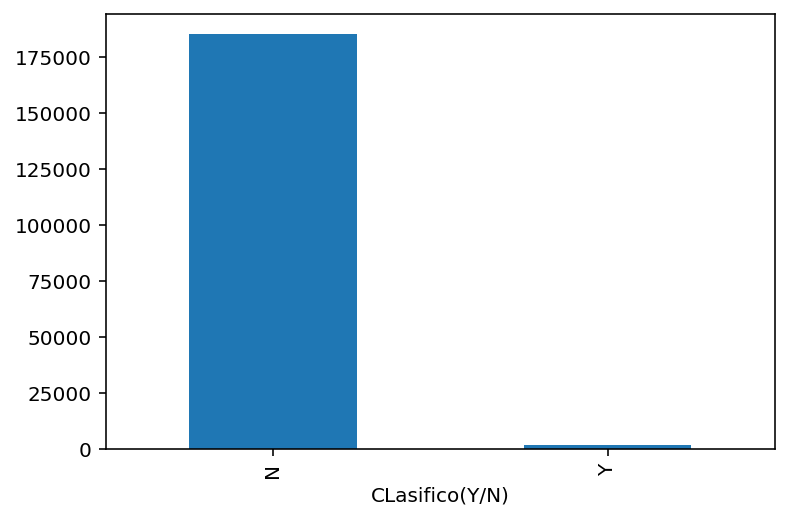

In [10]:
df_final['CLasifico(Y/N)']=df_final['Clasificación'].apply(lambda x: 'Y' if x != 'NI' else 'N')
df_final['CLasifico(Y/N)'].value_counts()

#Histograma de la clasificación

df_final['CLasifico(Y/N)'].value_counts().plot(kind='bar')

<Axes: xlabel='Clasificación'>

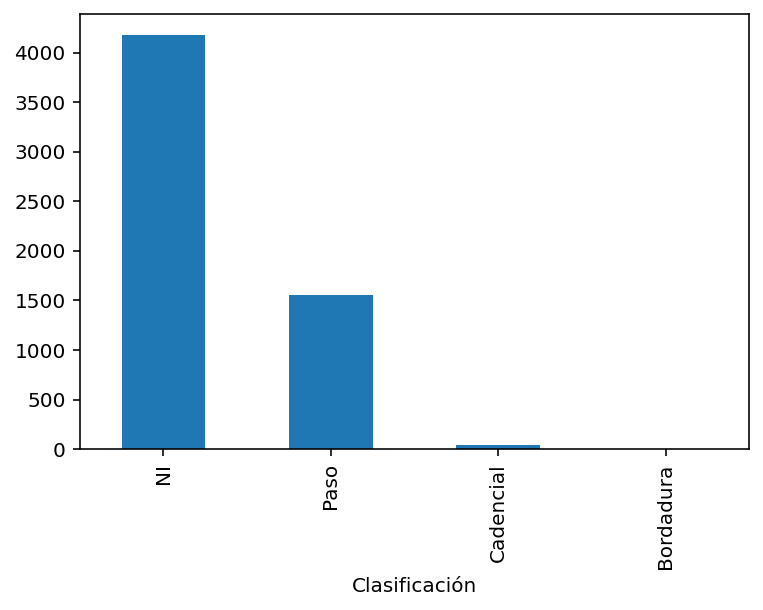

In [ ]:
df_final['Clasificación'].value_counts().plot(kind='bar')

<Axes: xlabel='Clasificación'>

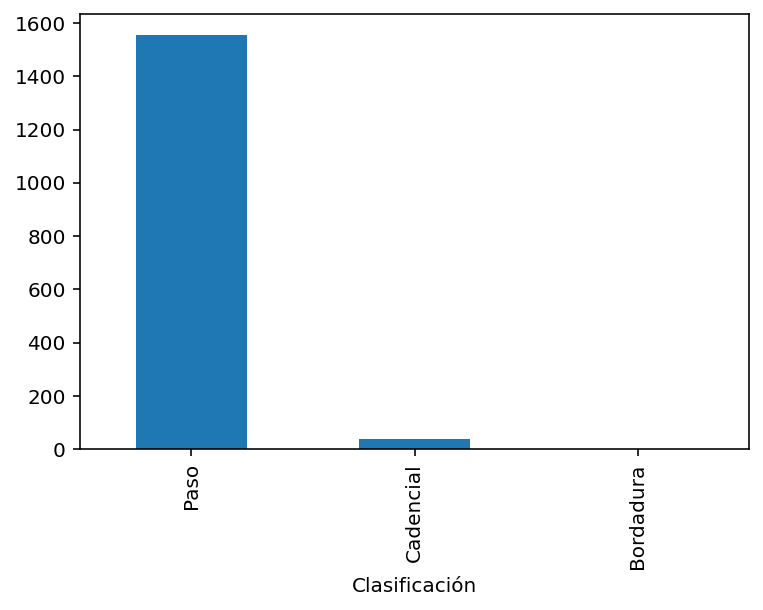

In [ ]:
df_final[df_final['Clasificación']!='NI']['Clasificación'].value_counts().plot(kind='bar')

In [ ]:
df_final

,Acordes,Compás,Beat,Duración,Suma_paso (n/4),Suma_cadencial (n/4),Suma_bordadura (n/3),Clasificación,Nombre,CLasifico(Y/N)
0,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
1,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
2,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
3,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
4,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
...,...,...,...,...,...,...,...,...,...,...
5767,"['F#3', 'B3', 'A4', 'D5']",2,2.5,0.5,3.0,1.0,0.0,NI,024511B_.xml,N
5768,"['E3', 'C#4', 'F#4', 'A4']",10,1.0,1.0,2.0,1.0,0.0,NI,024511B_.xml,N
5769,"['E3', 'C#4', 'E4', 'A4']",11,1.5,0.5,2.0,2.0,0.0,NI,024511B_.xml,N
5770,"['F#3', 'B3', 'D4', 'B4']",11,2.0,0.5,3.0,1.0,0.0,NI,024511B_.xml,N


In [ ]:
df_final

,Acordes,Compás,Beat,Duración,Suma_paso (n/4),Suma_cadencial (n/4),Suma_bordadura (n/3),Clasificación,Nombre,CLasifico(Y/N)
0,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
1,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
2,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
3,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
4,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
...,...,...,...,...,...,...,...,...,...,...
5767,"['F#3', 'B3', 'A4', 'D5']",2,2.5,0.5,3.0,1.0,0.0,NI,024511B_.xml,N
5768,"['E3', 'C#4', 'F#4', 'A4']",10,1.0,1.0,2.0,1.0,0.0,NI,024511B_.xml,N
5769,"['E3', 'C#4', 'E4', 'A4']",11,1.5,0.5,2.0,2.0,0.0,NI,024511B_.xml,N
5770,"['F#3', 'B3', 'D4', 'B4']",11,2.0,0.5,3.0,1.0,0.0,NI,024511B_.xml,N


In [ ]:
import ast
lista = ast.literal_eval(df_final['Acordes'][0])
len(lista)

3

In [ ]:
df_final['Acordes'] = df_final['Acordes'].apply(lambda x: ast.literal_eval(x))


In [ ]:
df_final[df_final['Acordes'].apply(len) < 4]

,Acordes,Compás,Beat,Duración,Suma_paso (n/4),Suma_cadencial (n/4),Suma_bordadura (n/3),Clasificación,Nombre,CLasifico(Y/N)
0,"[A3, D4, F#4]",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
1,"[A3, D4, F#4]",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
2,"[A3, D4, F#4]",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
3,"[A3, D4, F#4]",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
4,"[A3, D4, F#4]",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
...,...,...,...,...,...,...,...,...,...,...
5728,"[A3, F#4, D5]",6,1.0,0.5,1.0,1.0,0.0,NI,010306B_.xml,N
5729,"[A3, F#4, D5]",6,1.0,0.5,1.0,1.0,0.0,NI,010306B_.xml,N
5730,"[A3, F#4, D5]",6,1.0,0.5,1.0,1.0,0.0,NI,010306B_.xml,N
5731,"[A3, F#4, D5]",6,1.0,0.5,1.0,1.0,0.0,NI,010306B_.xml,N


In [ ]:
import plotly.express as px


fig = px.density_heatmap(df_final, x="Suma_bordadura (n/3)", y="Suma_cadencial (n/4)",text_auto=True,color_continuous_scale='BLUYL',title='Condiciones Cadencial vs Bordadura')
fig.show()

In [ ]:
fig = px.density_heatmap(df_final, x="Suma_paso (n/4)", y="Suma_cadencial (n/4)",text_auto=True,color_continuous_scale='BLUYL',title='Condiciones Cadencial vs Paso')
fig.show()

In [ ]:
fig = px.density_heatmap(df_final, x="Suma_paso (n/4)", y="Suma_bordadura (n/3)",text_auto=True,color_continuous_scale='BLUYL',title='Condiciones Paso vs Bordadura')
fig.show()

In [ ]:
df_si = df_final[df_final['CLasifico(Y/N)']=='Y']
nombres_cadencial = df_si[df_si['Clasificación']=='Cadencial']['Nombre'].tolist()
nombres_bordadura = df_si[df_si['Clasificación']=='Bordadura']['Nombre'].tolist()


In [ ]:
df_si[df_si['Clasificación']!='Paso']

,Acordes,Compás,Beat,Duración,Suma_paso (n/4),Suma_cadencial (n/4),Suma_bordadura (n/3),Clasificación,Nombre,CLasifico(Y/N)
300,"[G3, C4, E4]",6,4.0,1.0,2.0,2.0,3.0,Bordadura,008305B_.xml,Y
3333,"[E3, A3, E4, C#5]",8,1.0,1.0,1.0,4.0,0.0,Cadencial,009408B_.xml,Y
3906,"[F#3, B3, F#4, D#5]",8,1.0,1.0,1.0,4.0,1.0,Cadencial,004507B_.xml,Y
4050,"[A3, F#4, A4, D5]",11,4.0,0.5,0.0,4.0,0.0,Cadencial,039900B_.xml,Y
4051,"[D3, D4, G4, B4]",15,3.0,1.0,1.0,4.0,0.0,Cadencial,039900B_.xml,Y
4108,"[E3, E4, A4, C#5]",12,1.0,1.0,1.0,4.0,0.0,Cadencial,039500B_.xml,Y
4323,"[D3, B3, G4, D5]",3,2.0,0.5,1.0,4.0,0.0,Cadencial,028200B_.xml,Y
4354,"[D3, B-3, D4, G4]",4,3.0,1.0,3.0,4.0,0.0,Cadencial,016606B_.xml,Y
4355,"[D3, B-3, D4, G4]",4,3.0,1.0,3.0,4.0,0.0,Cadencial,016606B_.xml,Y
4356,"[D3, B-3, D4, G4]",4,3.0,1.0,3.0,4.0,0.0,Cadencial,016606B_.xml,Y


In [ ]:
path_error = '../Archivos/Corales/corales_completo/035400B_.xml'

prueba = cuartas(path_error)
df_error = prueba.extraer_df()

try:
    df_error_clasificacion = dataframe_clasificacion(df_error)
except:
    error as e
    print('Error as ')
df_error_clasificacion = dataframe_clasificacion(df_error)

SyntaxError: invalid syntax (471401369.py, line 9)